In [218]:
import pandas as pd
import nltk
from nltk.collocations import *
from nltk.collocations import BigramAssocMeasures
from nltk.collocations import BigramCollocationFinder
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
fourgram_measures = nltk.collocations.QuadgramAssocMeasures()
#http://librarycarpentry.org/lc-tdm/12-collocations/index.html
#https://www.nltk.org/howto/collocations.html
nltk.download('stopwords') # only do this once
import string
from nltk.corpus import stopwords
from nltk.probability import FreqDist

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zodia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [219]:
file = "G://My Drive/Code/IAA_TIPS/Copy of MSA 2023 STUDENT TIPS spreadsheet.xlsx"
data = pd.read_excel(file, sheet_name="2017")
spacer = [{"space": ". "}]
empty = pd.DataFrame(spacer)



In [220]:
#type(data)
#type(empty)
#print(empty)
#print(text)
#print(group)

pull out each column into its own frame and drop null
then make a single text string

In [221]:
#data_1 = data["TIP #1"]
#data_2 = data["TIP #2"]
##data_3=data["TIP #3"]
#data_4=data["Anything else you want to mention?"]
group = pd.concat([data["TIP #1"],empty["space"],data["TIP #2"],empty["space"],data["TIP #3"],
                   empty["space"],data["Anything else you want to mention?"]],ignore_index=True,axis=0)
#group = pd.concat([data["TIP #1"],data["TIP #2"],data["TIP #3"],
#                  data["Anything else you want to mention?"]],ignore_index=True,axis=0)
group.dropna(inplace=True)
text = ''
for row, item in group.iteritems():
    text = item + text
#print(text)

replace "don't" with dont so don't get a don.
below is where I tested some of the re features. 

In [222]:
import re
#l = ['oneXXX twoXXXbbb', "three999don't ", "0001don't22"]
#l_re_sub = [re.sub("(.*)don't(.*)", r'\2dont\1', s) for s in l if re.match(".*don't.*", s)]
# https://note.nkmk.me/en/python-list-str-select-replace/
# This command "re" is very powerful. What this does is take any thing that has a don't and replaces it 
# with a dont without changing anything else. 
test = ["The faculty and staff don't know Don't what they're doing and care don't deeply about your success. Don't. don't. know."]
l_re_sub = [re.sub("(.)don't(.)", r'\1dont\2', s) for s in test] #if re.match("*don't.*", s)]
test = l_re_sub
l_re_sub = [re.sub("(.)Don't(.)", r'\1Dont\2', s) for s in test]# if re.match(".*Don't.*", s)]


#print(l_re_sub)

In [223]:
#print(text)
#text was not in same format as test above. so fake it into similar format
l_text=[str(text)]
#l_text=list(text)
l_re_sub = str([re.sub("(.)don't(.)", r'\1dont\2', s) for s in l_text] )
l_text = [l_re_sub] # if I didn't do this, my list was single letters instead of words by the time I was done
l_re_sub = [re.sub("(.)Don't(.)", r'\1Dont\2', s) for s in l_text]
l_text2 = l_re_sub
#print(l_text2)
text2=str(l_text2)

break up the words into individual chunks. This would be a good place to continue to "clean" the data.

In [224]:
tokens = nltk.wordpunct_tokenize(text2)
print(tokens)

["['[\\'", 'Treat', 'this', 'like', 'a', 'job', '.', 'It', 'is', '.', 'Given', 'the', 'rigors', 'of', 'the', 'course', ',', 'it', 'might', 'be', 'challenging', ',', 'but', 'try', 'to', 'have', 'an', 'outlet', 'for', 'dealing', 'with', 'stress', '.', 'You', 'need', 'to', 'be', 'mentally', 'and', 'physically', 'healthy', 'for', 'yourself', ',', 'family', ',', 'and', 'teammates', '.', 'Have', 'fun', '!', 'Take', 'risks', '!', 'Remember', ',', 'no', 'one', 'is', 'paying', 'you', 'yet', '-', 'dont', 'be', 'afraid', 'to', 'get', 'creative', 'and', 'make', 'mistakes', '!', 'Be', 'nice', 'and', 'help', 'your', 'classmates', '.', 'Be', 'ready', 'to', 'learn', 'about', 'analytics', 'and', 'yourself', 'during', 'this', 'program', '!', 'When', 'you', "\\\\\\'", 're', 'facing', 'a', 'problem', 'on', 'homework', 'or', 'in', 'practicum', ',', 'dont', 'go', 'to', 'the', 'faculty', 'as', 'your', 'first', 'resource', '.', 'Try', 'to', 'solve', 'the', 'problem', 'on', 'your', 'own', 'or', 'with', 'other'

In [225]:
#type(tokens)

Clean up some of the messy words. Use a standard library and punctuation. And some items that you found that confused the analysis. 

In [226]:
remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits) +
                   list([').'] + list('!!!') + list("),") + list('"...') + list("\\\\\\'") +
                                 list('--') + list('e') + list('g')))
#print(remove_these)
new_word = '' # create an empty string
for word in tokens:
    if word not in remove_these:
        new_word = new_word +' '+ word.lower() # build new string word by word without bad
#print(new_word)   
# shorter way 
# filtered_text = [w for w in tokens if not w in remove_these] #http://librarycarpentry.org/lc-tdm/aio/index.html

Continute to clean up by trying to remove punctuation. Make new tokens. find pairs of words. List out 20 most common pairs. 

In [227]:
punct = re.compile("[^\w\s]") #https://likegeeks.com/python-remove-punctuation/
new_text = re.sub(punct,"",new_word)
tokens = nltk.wordpunct_tokenize(new_text)

finder = BigramCollocationFinder.from_words(tokens) #https://www.nltk.org/howto/collocations.html
#finder.apply_word_filter(lambda w: w in ('and','And', 'the' , 'a', 'also'))

#scored = finder.score_ngrams(bigram_measures.raw_freq)
#sorted(bigram for bigram, score in scored)
bigram_measures = BigramAssocMeasures()
finder.apply_freq_filter(3)
finder.nbest(bigram_measures.likelihood_ratio, 20)
#print(new_text)

[('make', 'sure'),
 ('job', 'search'),
 ('interview', 'season'),
 ('get', 'know'),
 ('pay', 'attention'),
 ('udemy', 'coursera'),
 ('feel', 'like'),
 ('take', 'advantage'),
 ('team', 'members'),
 ('take', 'time'),
 ('it', 'easy'),
 ('homework', 'teams'),
 ('homework', 'assignments'),
 ('homework', 'assignment'),
 ('have', 'fun'),
 ('information', 'sessions'),
 ('information', 'session'),
 ('every', 'employer'),
 ('it', 'important'),
 ('least', 'one')]

do triples. Find most common 3 words together in alphabetical order. 


In [228]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()

finder = TrigramCollocationFinder.from_words(tokens)
scored = finder.score_ngrams(trigram_measures.raw_freq)
set(trigram for trigram, score in scored) == set(nltk.trigrams(tokens))
sorted(finder.nbest(trigram_measures.raw_freq, 30))


[('119', 'people', 'exact'),
 ('99', 'time', 'keep'),
 ('a', 'mentor', 'especially'),
 ('abandoned', 'applied', 'experience'),
 ('abilities', 'talk', 'everyone'),
 ('abilities', 'you', 'capable'),
 ('able', 'absorb', 'information'),
 ('able', 'learn', 'everything'),
 ('abrasive', 'otherwise', 'bad'),
 ('absorb', 'information', 'taught'),
 ('academic', 'environment', 'becomes'),
 ('accomplished', 'open', 'suggestions'),
 ('across', 'cohorts', 'do'),
 ('across', 'industries', 'take'),
 ('active', 'this', 'also'),
 ('activities', 'hobbies', 'outside'),
 ('activities', 'order', 'relax'),
 ('activity', 'event', 'so'),
 ('actually', 'good', 'way'),
 ('actually', 'matter', 'network'),
 ('don', 'afraid', 'ask'),
 ('great', 'way', 'get'),
 ('help', 'trust', 'get'),
 ('homework', 'team', 'lead'),
 ('if', 'feel', 'like'),
 ('it', 'easy', 'spend'),
 ('learn', 'make', 'sure'),
 ('put', 'time', 'effort'),
 ('take', 'time', 'think'),
 ('way', 'get', 'know')]

this creates a window - finding words near but not next to each other. and shows how many times these combinations show up. making window larger means you aren't really sampling the same sentence or sentiment. could use this on more raw data (less filler removed) probably... to good effect. 

In [229]:
#sorted(finder.above_score(trigram_measures.raw_freq,
              #         1.0 / len(tuple(nltk.trigrams(tokens)))))
finder = TrigramCollocationFinder.from_words(tokens)
finder = TrigramCollocationFinder.from_words(tokens, window_size=4)
sorted(finder.nbest(trigram_measures.raw_freq, 4))
sorted(finder.ngram_fd.items(), key=lambda t: (-t[1], t[0]))[:12]

[(('practicum', 'homework', 'teams'), 3),
 (('ask', 'friends', 'ask'), 2),
 (('back', 'enjoy', 'process'), 2),
 (('balance', 'lifestyle', 'not'), 2),
 (('best', 'way', 'learn'), 2),
 (('beyond', 'covered', 'class'), 2),
 (('class', 'introduction', 'exposure'), 2),
 (('come', 'questions', 'related'), 2),
 (('company', 'information', 'session'), 2),
 (('covered', 'class', 'introduction'), 2),
 (('don', 'afraid', 'ask'), 2),
 (('enjoy', 'process', 'be'), 2)]

create an object that has the number of times each word shows up. and make a plot. I think the "filtering" is redundant at this stage as I did this above. but....

In [230]:
fdist = FreqDist(tokens)
fdist




FreqDist({'time': 38, 'get': 35, 'work': 31, 'program': 30, 'you': 27, 'team': 27, 'make': 26, 'learn': 26, 'take': 25, 'try': 24, ...})

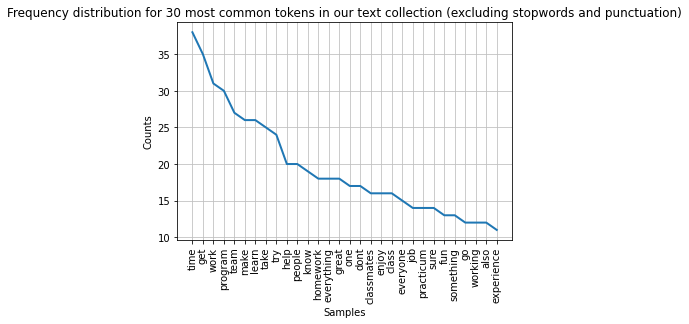

<AxesSubplot:title={'center':'Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

In [231]:
filtered_text = [w for w in tokens if not w in remove_these]
fdist_filtered = FreqDist(filtered_text)
fdist_filtered.plot(30,title='Frequency distribution for 30 most common tokens in our text collection (excluding stopwords and punctuation)')


In [232]:
#pip install wordcloud

Create wordclouds. All this code copied verbatim from http://librarycarpentry.org/lc-tdm/aio/index.html

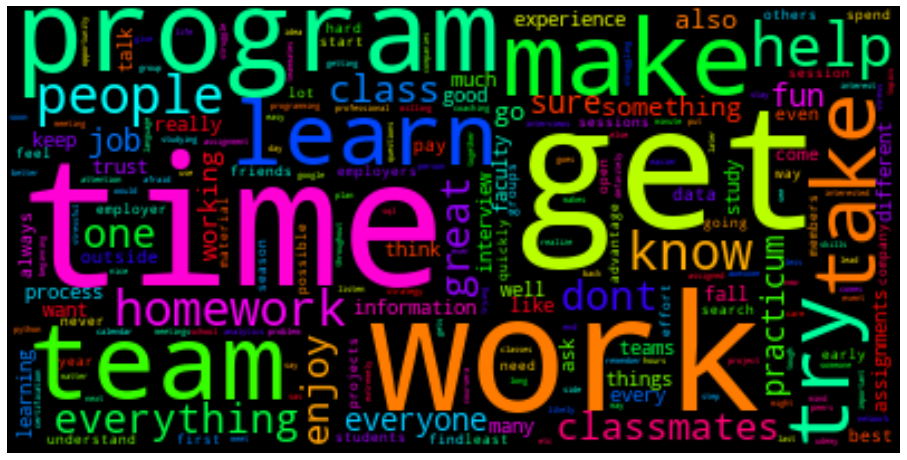

In [233]:
from collections import Counter
dictionary=Counter(filtered_text)
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(dictionary)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()


(-0.5, 277.5, 157.5, -0.5)

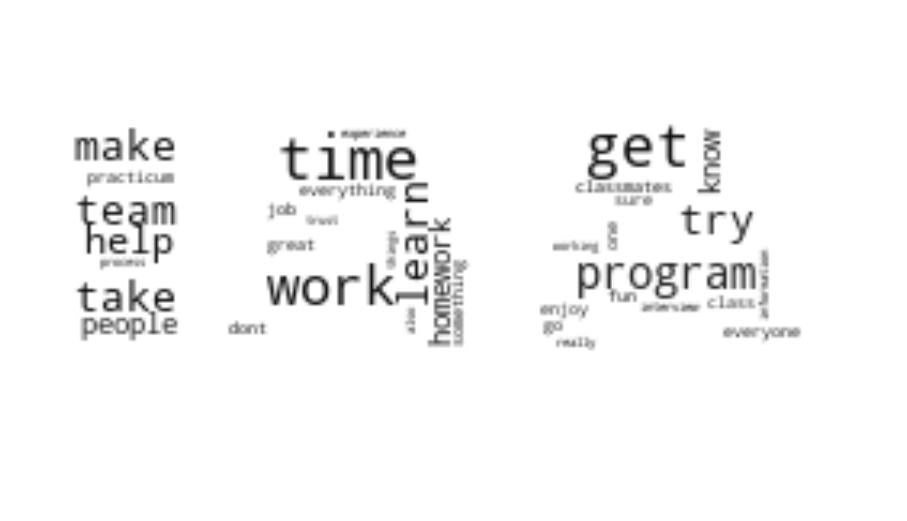

In [234]:
from PIL import Image
import numpy as np
IAA_mask = np.array(Image.open("IAA.png"))

# Custom Colormap
from matplotlib.colors import LinearSegmentedColormap
colors = ["#000000", "#111111", "#101010", "#121212", "#212121", "#222222"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)

wc = WordCloud(background_color="white", mask=IAA_mask, colormap=cmap)
wc.generate_from_frequencies(dictionary)
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
